# Ch6-5. Pie chart

`pyplot.pie` 함수를 이용하여 산점도를 그릴 수 있다.

> x : 각 pie의 크기  
labels : 각 pie에 부착되는 라벨  
labeldistance : 라벨 간 거리(파이 안에 나타나길 원하면 보통 0.3~0.4 정도가 적절)  
normalize : 비율을 나타낼 것인지 여부  
autopct : 위에 표시될 숫자 형태 (예: `"%1.1f%%"`, `"%1d%%"`)  
colors : 배열로 지정하여 파이의 각 파트 색상을 순서대로 설정 가능  

# Pandas 객체의 method를 이용한 산점도 그리기
`DataFrame.plot()` 함수를 사용하면 DataFrame을 사용한 그래프를 손쉽게 그릴 수 있으며, 산점도 역시 그릴 수 있다.

> kind : 그래프 종류 (line이면 선 그래프를 그림)  
x : 각 pie의 크기
y : 각 pie에 부탁되는 라벨



## 경로 설정

In [1]:
import pandas as pd
import os
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/1. 데이터 핸들링/데이터")

In [2]:
df = pd.read_csv("판매실적통합본.csv", encoding = "cp949")
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


## groupby로 원하는 것 구하기

In [4]:
# 제품군별 수량합계 계산
grouped_df1 = df.groupby(['제품군'], as_index = False)['수량'].sum()
grouped_df1

,제품군,수량
0,제품 1,2690307
1,제품 2,4223384
2,제품 3,531946
3,제품 4,277193
4,제품 5,126323
5,제품 6,262774


In [5]:
grouped_df1.sort_values(by = '수량')['수량']

4     126323
5     262774
3     277193
2     531946
0    2690307
1    4223384
Name: 수량, dtype: int64

현재 데이터 행 별로 스케일이 크게 차이가 난다. 그래서 기타 행을 추가하도록 하려고 한다.  
몇 퍼센트 이하는 기타로 취급하도록 정해져있기도 하다.  

기타 행 추가를, 강사님은 직접적으로 모양을 같게 바로 나오도록 하게 하였다.  
하나의 행을 데이터프레임으로 만들어서 concat으로 이어붙이도록 하려고 한다. 



In [6]:
# 데이터를 확인한 후 6개 행중 2개 행을 제외한 나머지가 전부 따로 표시되도록 한다.
other_row = pd.DataFrame({'제품군':['기타'],
                        '수량':[grouped_df1.sort_values(by = '수량')['수량'].iloc[:4].sum()]})
other_row

,제품군,수량
0,기타,1198236


In [9]:
# 기타행을 원래 데이터와 병합한 후 내림차순 정렬
grouped_df2 = pd.concat([grouped_df1, other_row], axis = 0, ignore_index = True)
grouped_df2.sort_values(by = '수량', ascending = False)

,제품군,수량
1,제품 2,4223384
0,제품 1,2690307
6,기타,1198236
2,제품 3,531946
3,제품 4,277193
5,제품 6,262774
4,제품 5,126323


In [10]:
# 기타행에 포함된 나머지 행들(제품군 4개)을 삭제
grouped_df2 = grouped_df2.sort_values(by = '수량', ascending = False).iloc[:3]
grouped_df2

,제품군,수량
1,제품 2,4223384
0,제품 1,2690307
6,기타,1198236


## pyplot을 이용한 그래프 그리기

In [11]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (4, 4)

([<matplotlib.patches.Wedge at 0x7f9d1b26ed60>,
 [Text(-0.025917341908690408, 0.3991594811455542, '제품 2'),
  Text(-0.15547802001060262, -0.36854658497072346, '제품 1'),
  Text(0.35769822495847803, -0.17903066737727943, '기타')],
 [Text(-0.03887601286303561, 0.5987392217183313, '52.1%'),
  Text(-0.23321703001590388, -0.5528198774560851, '33.2%'),
  Text(0.536547337437717, -0.26854600106591914, '14.8%')])

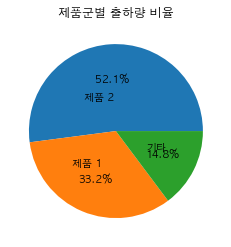

In [16]:
# 제품군별 출하량 합계 계산하기

plt.title('제품군별 출하량 비율')

plt.pie(x = grouped_df2['수량'],      # 파이차트 값
       labels = grouped_df2['제품군'],  # 각 파이 라벨  
       labeldistance = 0.4, # 라벨 위치 
       autopct = '%1.1f%%') # 소수점 첫째자리까지